In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
from math import ceil
os.chdir('../../util/')
from jags_ydich_xnomssubj_mbernbeta import plot_mcmc
np.random.seed(2)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


** Exercise 8.4. [Purpose: Explore the prior on a difference of parameters implied from the priors on the individual parameters.]**

**(A)** Reproduce Figure 8.7 in Section 8.5. Explain how you did it.

We do that by sampling the prior. In PyMC3 this is done differently than how it is done in JAGS. We need to use `sample_prior_predictive` instead of passing empty data. One we sample the prior we can manually invoke the `plot_mcmc` method. In order to make that work I needed to take the value returned by `sample_prior_predictive`, which is a dictionary instead of a trace, and add a `varnames` porperty to it. 

In [2]:
# Sampling the prior
theta = []
parameters = []
with pm.Model() as model:
    for i in range(2):
        theta.append(pm.Beta('theta_' + str(i + 1), alpha = 2, beta = 2))
        parameters.append('theta_' + str(i + 1))
    trace = pm.sample_prior_predictive(samples = 50000)

In [3]:
# Adding a varnames property to the trace
class MyDict(dict):
    def __init__(self, original):
        for k in original.keys():
            self[k] = original[k]
    def __getitem__(self, key):
        return getattr(self, key)
    def __setitem__(self, key, value):
        setattr(self, key, value)

trace = MyDict(trace)
trace.varnames = parameters

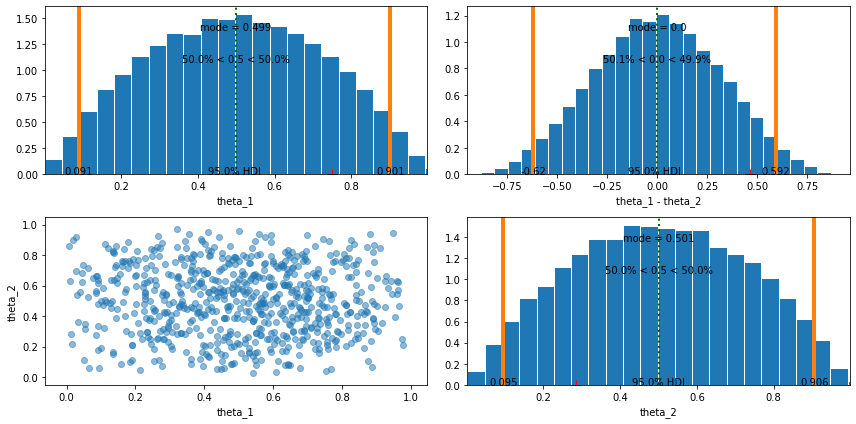

In [4]:
plot_mcmc(trace, 
          data = pd.read_csv('z6n8z2n7.csv'), 
          comp_val_diff = 0.0, 
          cen_tend = 'mode', 
          cen_tend_diff = 'mode')

**(B)** Change the priors on the individual $\theta$'s to be $\text{beta}(\theta|1,1)$ and produce the figure anew. Describe the panels and explain. 

In [5]:
# Sampling the prior and adding varnames property
theta = []
parameters = []
with pm.Model() as model:
    for i in range(2):
        theta.append(pm.Beta('theta_' + str(i + 1), alpha = 1, beta = 1))
        parameters.append('theta_' + str(i + 1))
    trace = pm.sample_prior_predictive(samples = 50000)
trace = MyDict(trace)
trace.varnames = parameters

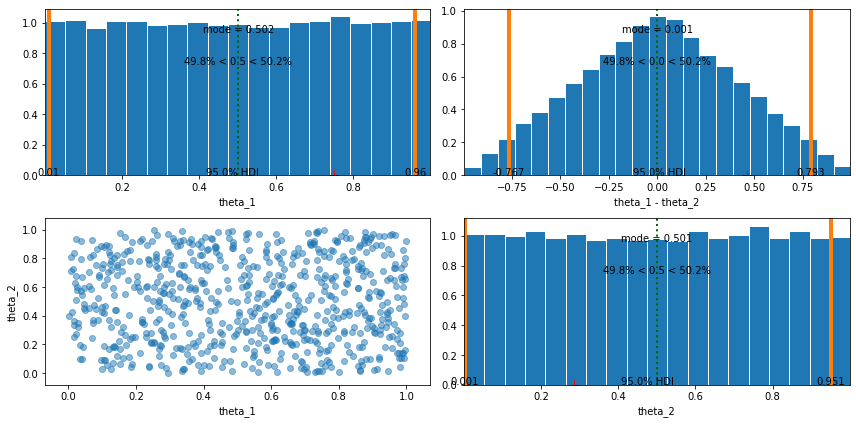

In [6]:
plot_mcmc(trace, 
          data = pd.read_csv('z6n8z2n7.csv'), 
          comp_val_diff = 0.0, 
          cen_tend = 'mode', 
          cen_tend_diff = 'mode')

Since we are using a=b=1, the priors for $\theta_1$ and $\theta_2$ are both uniform distributions. This can be easily observed on the scatter plot on the bottom left corner, which clearly displays how values for both parameters were uniformly sampled in the range between 0 and 1. However, the prior for $\theta_1 - \theta_2$ is not uniform and looks more like a pyramid. Since the priors in this exercise provide less certainty than the priors in the previous exercise, the distribution for $\theta_1 - \theta_2$ has a wider HDI.

**(C)** Change the priors on the individual $\theta$'s to $\text{beta}(\theta|0.5, 0.5)$ and produce the figure again. Describe its panels and explain.

In [7]:
# Sampling the prior and adding varnames property
theta = []
parameters = []
with pm.Model() as model:
    for i in range(2):
        theta.append(pm.Beta('theta_' + str(i + 1), alpha = 0.5, beta = 0.5))
        parameters.append('theta_' + str(i + 1))
    trace = pm.sample_prior_predictive(samples = 50000)
trace = MyDict(trace)
trace.varnames = parameters

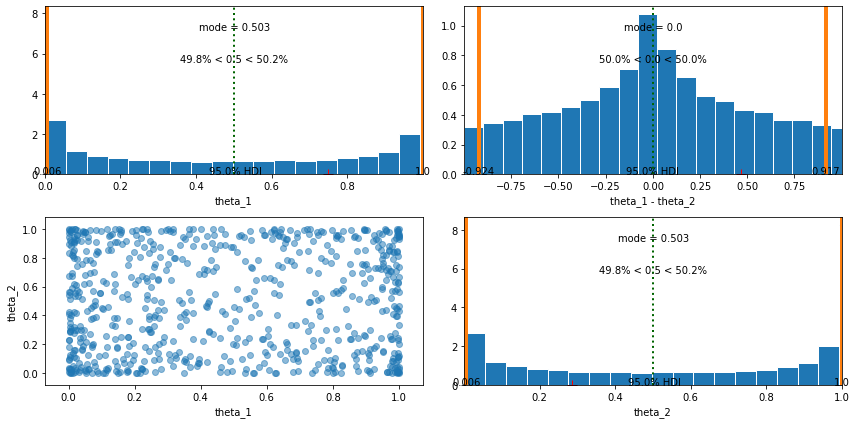

In [8]:
plot_mcmc(trace, 
          data = pd.read_csv('z6n8z2n7.csv'), 
          comp_val_diff = 0.0, 
          cen_tend = 'mode', 
          cen_tend_diff = 'mode')

These priors assign a higher initial likelihood to $\theta$ values that are closest to the extremes (0 and 1). This can be clearly observed on the scatter plot at the bottom left corner, in which the highest density of points is at the corners of the plot. The mode for $\theta_1 - \theta_2$'s prior is still at 0, but there's not as much certainty about this mode as in the case of the previous sections: the prior has wider tails in this case. 